# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy



In [4]:
# Set the API base URL
BASE_URL = f"https://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}&units=imperial"

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0  
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    # Add 1 to the record count
    record_count += 1

    # Create endpoint URL with each city
    city_url = f"{BASE_URL}&q={city}"
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
            # If an error is experienced, skip the city
    except KeyError:
        print(f"{city} not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atafu village
atafu village not found. Skipping...
Processing Record 2 of Set 1 | weno
weno not found. Skipping...
Processing Record 3 of Set 1 | fort st. john
fort st. john not found. Skipping...
Processing Record 4 of Set 1 | jamestown
jamestown not found. Skipping...
Processing Record 5 of Set 1 | stanley
stanley not found. Skipping...
Processing Record 6 of Set 1 | adamstown
adamstown not found. Skipping...
Processing Record 7 of Set 1 | grums
grums not found. Skipping...
Processing Record 8 of Set 1 | grytviken
grytviken not found. Skipping...
Processing Record 9 of Set 1 | isangel
isangel not found. Skipping...
Processing Record 10 of Set 1 | miri
miri not found. Skipping...
Processing Record 11 of Set 1 | ushuaia
ushuaia not found. Skipping...
Processing Record 12 of Set 1 | margaret river
margaret river not found. Skipping...
Processing Record 13 of Set 1 | necochea
necochea not found. Sk

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()




Series([], dtype: int64)

In [16]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


In [15]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

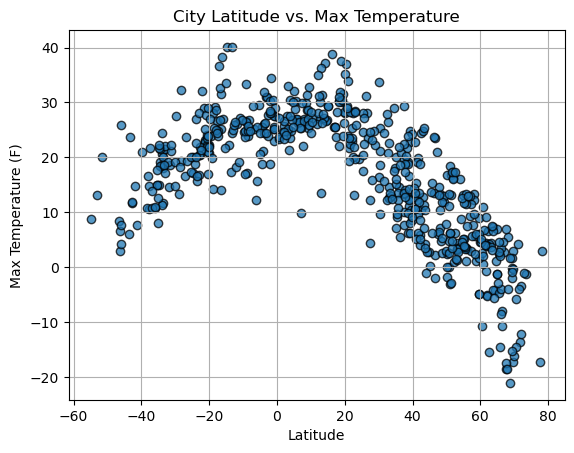

In [17]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("Output_CSV/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

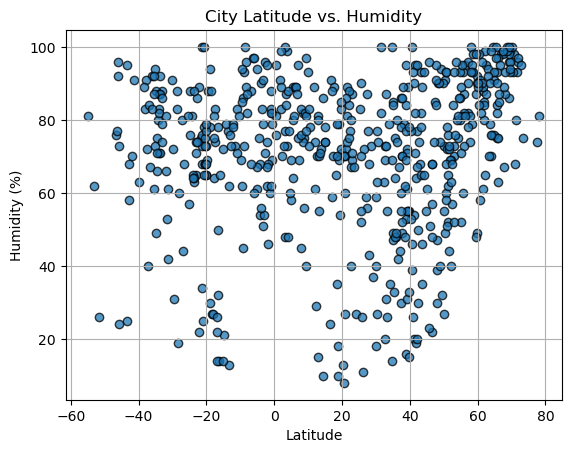

In [18]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("Output_CSV/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

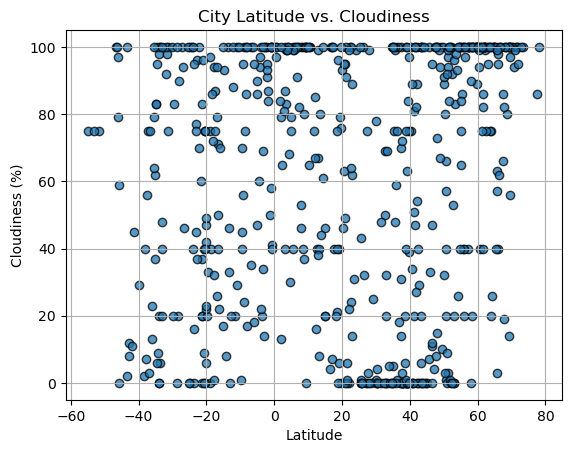

In [19]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("Output_CSV/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

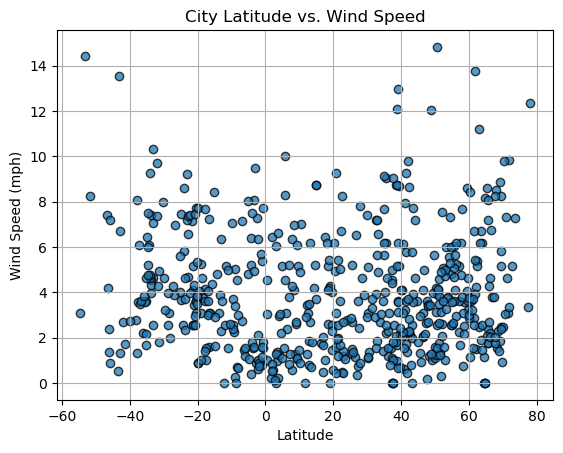

In [20]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)


# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8462548186825364


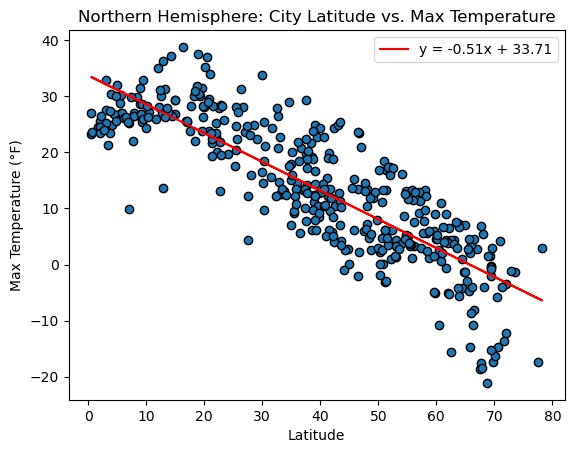

In [23]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_df["Lat"], northern_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties

plt.title("Northern Hemisphere: City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")

# Calculate and plot the linear regression
x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.plot(x_values, regress_values, "r-", label=line_eq)
plt.legend()
print(f"The r-value is {rvalue}")

The r-value is 0.6419546065421801


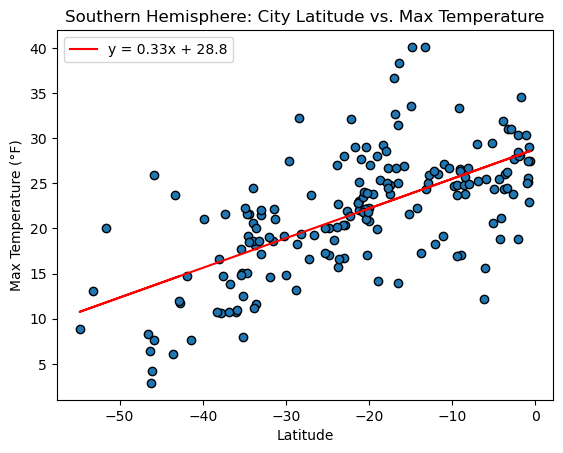

In [24]:
# Linear regression on Southern Hemisphere
southern_df = city_data_df[city_data_df["Lat"] < 0]
plt.scatter(southern_df["Lat"], southern_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("Southern Hemisphere: City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.plot(x_values, regress_values, "r-", label=line_eq)
plt.legend()
print(f"The r-value is {rvalue}")

**Discussion about the linear relationship:** 
The scatter plot displays a generally negative correlation between latitude and maximum temperature, suggesting that as you move closer to the South Pole (lower latitude values), the temperatures tend to increase.
The linear regression line helps visualize this trend, and the equation provides a quantitative representation of the relationship.
In contrast, the scatter plot for the Northern Hemisphere shows a similar negative correlation, indicating that as you move towards the North Pole (higher latitude values), the temperatures tend to decrease.


### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.2385317912939407


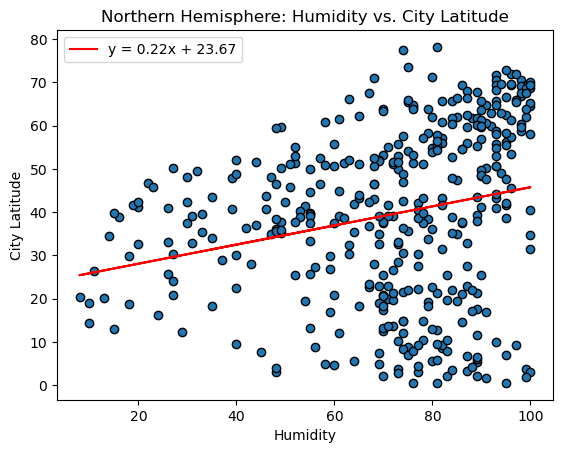

In [25]:
# Northern Hemisphere
plt.scatter(northern_df["Humidity"], northern_df["Lat"], marker="o", edgecolors="black")

# Incorporate the other graph properties

plt.title("Northern Hemisphere: Humidity vs. City Latitude")
plt.xlabel("Humidity")
plt.ylabel("City Latitude")

# Calculate and plot the linear regression
x_values = northern_df["Humidity"]
y_values = northern_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.plot(x_values, regress_values, "r-", label=line_eq)
plt.legend()
print(f"The r-value is {rvalue}")

The r-value is 0.016759316950056818


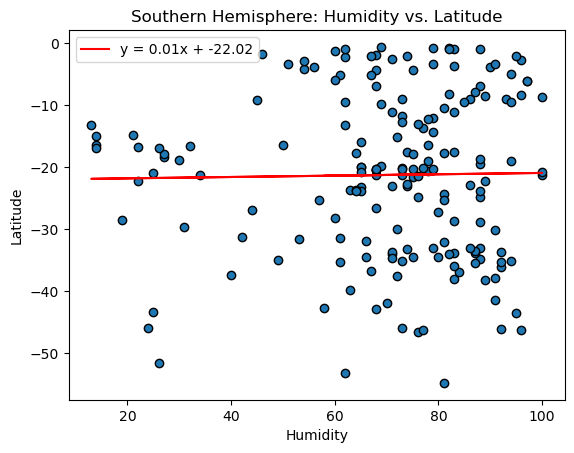

In [26]:
# Southern Hemisphere
plt.scatter(southern_df["Humidity"], southern_df["Lat"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("Southern Hemisphere: Humidity vs. Latitude")
plt.xlabel("Humidity")
plt.ylabel("Latitude")
x_values = southern_df["Humidity"]
y_values = southern_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.plot(x_values, regress_values, "r-", label=line_eq)
plt.legend()
print(f"The r-value is {rvalue}")

**Discussion about the linear relationship:** 
By comparing the r-values in both hemispheres, you can assess the strength and direction of the linear relationship. A positive r-value suggests a positive correlation, while a negative r-value indicates a negative correlation. The closer the r-value is to 1 or -1, the stronger the correlation.
These visualizations and regression analyses help explore and quantify the potential link between humidity and latitude in different hemispheres.

If the slope of the regression line is positive, it suggests a positive correlation between humidity and latitude in the Northern Hemisphere.

The linear regression line provides insights into the potential relationship between humidity and latitude in the Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.155004893876971


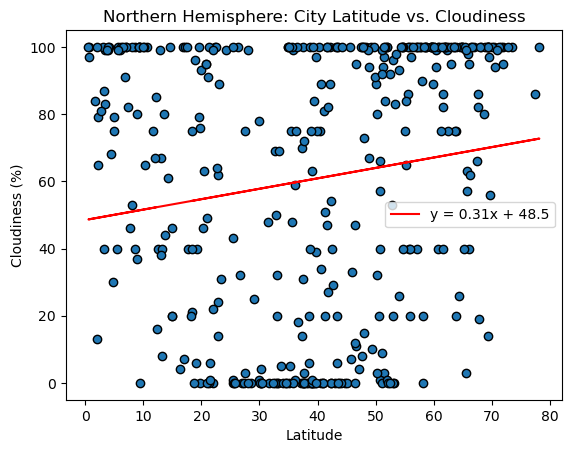

In [27]:
# Northern Hemisphere
plt.scatter(northern_df["Lat"], northern_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties

plt.title("Northern Hemisphere: City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Calculate and plot the linear regression
x_values = northern_df["Lat"]
y_values = northern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.plot(x_values, regress_values, "r-", label=line_eq)
plt.legend()
print(f"The r-value is {rvalue}")

The r-value is 0.14341322916643243


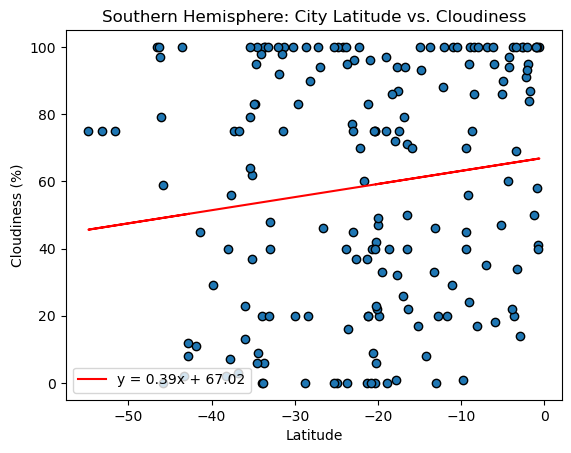

In [28]:
# Southern Hemisphere
southern_df = city_data_df[city_data_df["Lat"] < 0]
plt.scatter(southern_df["Lat"], southern_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("Southern Hemisphere: City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
x_values = southern_df["Lat"]
y_values = southern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.plot(x_values, regress_values, "r-", label=line_eq)
plt.legend()
print(f"The r-value is {rvalue}")

**Discussion about the linear relationship:** he relationship between Cloudiness and Latitude seems consistently comparable in both the Southern and Northern Hemispheres. Examining the Northern Hemisphere reveals a positive linear correlation, indicating that as latitude increases, cloudiness also tends to increase. Similarly, in the Southern Hemisphere, an increase in latitude is associated with an increase in cloudiness, reflecting a consistent pattern across hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.1743466729090334


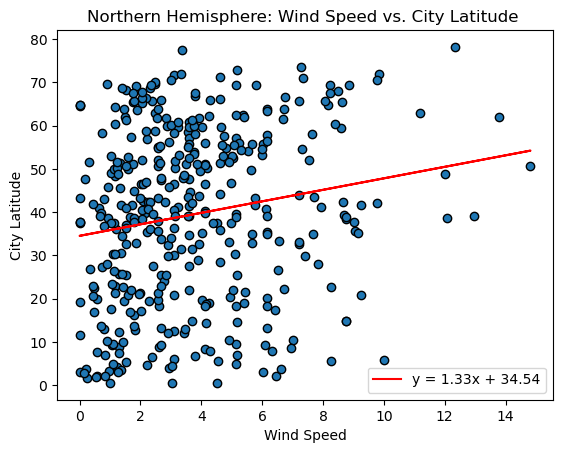

In [29]:
# Northern Hemisphere
plt.scatter(northern_df["Wind Speed"], northern_df["Lat"], marker="o", edgecolors="black")

# Incorporate the other graph properties

plt.title("Northern Hemisphere: Wind Speed vs. City Latitude ")
plt.xlabel("Wind Speed")
plt.ylabel("City Latitude")

# Calculate and plot the linear regression
x_values = northern_df["Wind Speed"]
y_values = northern_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.plot(x_values, regress_values, "r-", label=line_eq)
plt.legend()

print(f"The r-value is {rvalue}")

The r-value is -0.24947753546264592


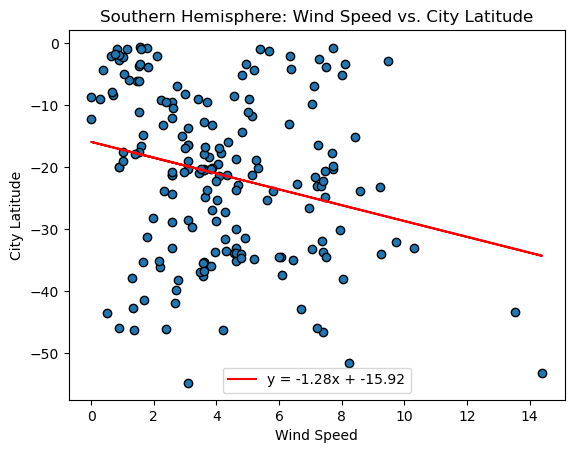

In [30]:
# Southern Hemisphere
southern_df = city_data_df[city_data_df["Lat"] < 0]
plt.scatter(southern_df["Wind Speed"], southern_df["Lat"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("Southern Hemisphere: Wind Speed vs. City Latitude")
plt.xlabel("Wind Speed")
plt.ylabel("City Latitude")

#Calculate Linear Regressions
x_values = southern_df["Wind Speed"]
y_values = southern_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.plot(x_values, regress_values, "r-", label=line_eq)
plt.legend()

print(f"The r-value is {rvalue}")

**Discussion about the linear relationship:** The correlation between Humidity and Latitude appears to exhibit significant variation between the Southern and Northern Hemispheres. In the Northern Hemisphere, a positive linear relationship becomes evident, indicating that as latitude increases, both humidity and wind speed tend to rise. Conversely, in the Southern Hemisphere, an increase in latitude is associated with a decrease in wind speed, contrasting the observed pattern in the Northern Hemisphere.